# DSUA-111 Project: 
# Lower COVID-19 rates in more corrupt countries?

Maya (Maida) Sjaric

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot

# Part 1: Pre-Step

**Q1:** Describe briefly the question you would like to answer or the topic you would like to explore. Essentially, what do you hope to learn from your analysis?

In this quantitative account, an attempt will be made to establish an understanding of the interplay between perceived corruption and the impact of COVID-19 in any given country. More specifically, and perhaps more elegantly put, we will begin to formulate a neuanced answer to the following question: 

#### **Can we predict a country's total cases per million, on the basis of information about their perceptions of corruption?** 

The product of this analysis can potentially establish a more robust foundation upon which other post-modern intellectual pursuits can develop, in our shared effort to untangle the knotty significance of socio-political indicators on a country's ability to mitigate public health crises. At the outset of the COVID-19 pandemic, the country of Iran was one of the most harshly affected nations in the world, and received enormous international attention. One of the questions that some of Iran's spectators and citizens were concerned with, in the context of its high number of COVID-19 cases, was the effects of political distrust on the virus' rate of spread. This particular investigation might help shed some light on the possible association between corruption and pandemic outcomes. Deeper philosophical exlorations, sadly, lie beyond the scope of this study.

# Part 2: Data

**Q2:** Find a dataset that may help you explore at least some of these questions. First, describe where you found the data set. Second, describe how you found it. Third, describe at least two variables in the dataset that are relevant to the analysis you described above. Finally, describe the unit of observation (individual, city, etc.).

Two datasets were combined into one for this analytical purpose.

### COVID-19 Dataset: 

The dataset containing statistics concerning the impact of COVID-19 for each of the available countries was found on **Our World in Data**'s webpage (https://ourworldindata.org/coronavirus-source-data). After a persistent effort to understand the available literature through Google, this dataset emerged as the most promising, comprehensive and relevant account of the matter. For reference, "covid 19 stats csv" was the phrase that led to my discovery of this dataset through Google. Other search engines, including github and kaggle, were also considered, but this dataset appeared most appropriate for the purposes of this study.

- **Variable of Interest (1):** interpretation of the chosen variable **'total_cases_per_million'** is largely unreliant on a consideration of subjectivity; it simply reflects the known aggregate number of COVID-19 cases per million for each country. This column was deliberately selected as the most appropriate variable, due to the fact that columns containing total cases and total deaths, for instance, might fail to capture the dynamic internal factors that influence a country's ability to mitigate the detrimental effect of public health crises. For this reason, the 'total_cases_per_million' column appears to be a more genuine reflection of the ability of a country to lessen the negative effects of pandemics on its population. It follows logically that a large country is likely to have more cases, but if these cases represent a smaller portion of their population, then these numbers might be misleading. Likewise, deaths might not reflect the consequences of a country's ability to control the spread of disease factors as precisely, due to the likelihood that the country's health care system would play an integral role in death numbers. Other columns were often incomplete or reflective of a short time-frame etc., which leaves us with 'total_cases_per_million' as the most ideal variable to study.

### Corruption Dataset:

The second dataset containing the available countries' "Perceptions of corruption" score was found on https://www.kaggle.com/unsdsn/world-happiness, and the year 2018 was chosen for the latter dataset. It data originally stems from the The Gallup World Poll. Likewise, other datasets, both within and beyond the kaggle environment, were also considered, but this dataset appeared to be most appropriate for this study.

- **Variable of Interest (2):** the column **"Perceptions of corruption"** relates to the goals established in part 1, namely, to better understand the impact of corruption on pandemic outcomes. The values in this column range from 0.0 (indicates that people perceive great corruption) to 0.453 (indicates lower levels of perceived corruption). The Gallup World Poll describes this variable as "the average of binary answers to two GWP questions: “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?”" Note that where data for government corruption were missing, the perception of business corruption was used as the overall corruption-perception measure.

**Unit of Observation:** All the countries for which both COVID-19 and "Perceived corruption" data was within our reach. In total, we have 144 countries at our disposal, as indicated by the output of the 'shape' method on the final_table (the ultimate table that we end up with, after adjusting the datasets to suit our goals, i.e. the 8th table containing all the relevant columns from our two datasets.)

As will become evident momentarily, multiple operations are required to make these available datasets useful in this analysis.

**Q3:** If you could change this dataset in one way to make it better for your analysis, what would that change be and how could it improve your analysis?

A separation of the "Perceptions of corruption" data into business- and politically-related corruption would have allowed us to better understand possible solutions to the issue of high total_cases_per_million values, should we observe a compelling association between the two chosen variables. It would be useful to know whether political corruption or business-related corruption more substantively contribute to health outcomes.

Additionally, an incorporation of a more diverse set of factors, such as expert opinions, into the corruption score could potentially serve to more accurately represent the country's corruption status and it could potentially strengthen our ability to made predictions on its basis.

**Q4:** Import the dataset into Jupyter using any method you like and show the first five observations. If you had to do any pre-work to get the data into an uploadable format please describe it briefly. (If you didn’t, please say so as well.)

The need to sort and delete certain columns and rows in our two datasets was already alluded to above. Essentially, observations that were available in one dataset but not in the other dataset were deleted; this process was done for each dataset. Columns that are not relevant to the question of our concern were also deleted in both tables. Additionally, the "index" column was changed in one of the tables (in order to allow for the transfer of one column into the other, i.e. to avoid index mismatch). The two tables were also sorted by the respective country columns, in order to ensure that the data would match later on when we combine the most relevant columns in the final step.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot 

**Table (1) Perceived Corruption:**

This table contains information concerning 8 socio-political indicators for 156 countries, as indicated in the output of the .shape() method. The indicators that will be of interest to us is contained in the **'Perceptions of corruption'** column: 


In [10]:
corruption = pd.read_csv("corruption.csv")
corruption.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [11]:
np.shape(corruption)

(156, 9)

**Table (2) COVID-19:**

This table contains 15756 observations concerning the prevalence of COVID-19 around the world. The variable that is of interest to us is the **'total_cases_per_million'** column: 

In [12]:
covid = pd.read_csv("covid.csv")
covid.head(5)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [13]:
np.shape(covid)

(15756, 16)

## Hold on...
Before we can proceed with the analysis, **we need to ensure that only countries ('observations') that are represented in both datasets are used in our analysis (in equal proportions, and in the right order!)**. Therefore, we first apply the .loc() method to remove any countries in the covid dataset that are not included in the 'Country or region' column in the corruption dataset. 

**reduced_covid (3) Table:**

In [14]:
countries = corruption['Country or region']

In [15]:
reduced_covid = covid.loc[covid['location'].isin(countries)]
reduced_covid.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
46,AFG,Afghanistan,2019-12-31,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
47,AFG,Afghanistan,2020-01-01,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
48,AFG,Afghanistan,2020-01-02,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
49,AFG,Afghanistan,2020-01-03,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
50,AFG,Afghanistan,2020-01-04,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


**reduced_covid_april_28 (4) Table:**

Next, we eliminate all entries in the reduced_covid table whose "date" do not correspond to the randomly selected date '2020-04-28'. The main purpose of this is to limit each country's representation to just one row (observation). 

In [16]:
covid_april_28 = ["2020-04-28"]

In [17]:
reduced_covid_april_28 = reduced_covid.loc[reduced_covid['date'].isin(covid_april_28)]
reduced_covid_april_28.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
155,AFG,Afghanistan,2020-04-28,1703,172,57,0,43.747,4.418,1.464,0.000,NaN,NaN,NaN,NaN,NaN
304,ALB,Albania,2020-04-28,736,10,28,0,255.751,3.475,9.730,0.000,NaN,NaN,NaN,NaN,NaN
482,ARE,United Arab Emirates,2020-04-28,10839,490,82,6,1095.911,49.543,8.291,0.607,NaN,NaN,NaN,NaN,NaN
544,ARG,Argentina,2020-04-28,3990,223,197,11,88.283,4.934,4.359,0.243,53600.0,1700.0,1.186,0.038,tests performed
664,ARM,Armenia,2020-04-28,1867,59,30,1,630.055,19.911,10.124,0.337,NaN,NaN,NaN,NaN,NaN


**reduced_corruption (5) Table:**

In this step, we ensure that only countries that were represented in the most updated covid table (reduced_covid_april_28) are included in the corruption dataset containing the socio-political indicator ('Perceptions of corruption') of interest to us. This will ensure that we have the same number of rows in each dataset, in order to allow us to combine and match corresponding variables across these two datasets.

In [18]:
countriess = reduced_covid_april_28['location']

In [19]:
reduced_corruption = corruption.loc[corruption['Country or region'].isin(countriess)]
reduced_corruption.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


**Sorting the COVID-19 Table - new_sorted_covid (6):**

Here, we drop the columns unrelated to our study, and sort the most updated COVID-19 table according to the location variable. We do the same to the most updated corruption table (reduced_corruption), i.e. we sort it by the "Country or region" variable.

In [20]:
sorted_covid = reduced_covid_april_28.sort_values(by=['location'])
new_sorted_covid = sorted_covid.drop(columns=['iso_code', 'total_cases', 'total_deaths', 'date', 'new_cases', 'new_deaths', 'new_cases_per_million', 'new_deaths_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand' , 'new_tests_per_thousand' , 'tests_units', 'total_deaths_per_million'])
new_sorted_covid.head()

,location,total_cases_per_million
155,Afghanistan,43.747
304,Albania,255.751
4198,Algeria,80.203
544,Argentina,88.283
664,Armenia,630.055


Again, here we just sort the corruption table in the same way, in order to ensure that corresponding columns across the two datasets match. 

In [21]:
sorted_corruption = reduced_corruption.sort_values(by=['Country or region'])
sorted_corruption.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
106,107,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027
87,88,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114
46,47,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050
115,116,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064


**Combining Columns Across Our Datasets:**

In this final step, we simply update the index of latest covid dataset, to reflect the same number as the corresponding country in the latest corruption table. 

In [22]:
new_sorted_covid = new_sorted_covid.set_index(sorted_corruption.index)

## Putting It All Together:

Here we assign the variable from the corruption dataset of interest to us to the variable 'corruption'.


#### **Final Table:**
Then we create a new column in the most updated COVID-19 dataset (**new_sorted_covid**), containing this variable:

In [23]:
corruption = sorted_corruption['Perceptions of corruption']

In [24]:
new_sorted_covid["Perceptions of corruption"] = corruption

In [25]:
final_table = new_sorted_covid.rename(columns={'Perceptions of corruption': 'corruption'})
final_table.head()

,location,total_cases_per_million,corruption
153,Afghanistan,43.747,0.025
106,Albania,255.751,0.027
87,Algeria,80.203,0.114
46,Argentina,88.283,0.050
115,Armenia,630.055,0.064


# Part 3: Initial Analysis

**Q5:** Conduct at least two different manipulations of your now-ready table that help you understand something of interest about the dataset (e.g., you might explore options like sort_values(), shape, value_counts(), groupby(), etc.). Why did you choose these two, and what have you learned? (Hint: You may need to do a bit of work to get the data into a format that is usable for you -- e.g., renaming columns, changing data types, etc. If any of this was necessary, show your code and briefly explain why you made these changes)

Firstly, we will use the shape method to learn more about the properties of this dataset, as it relates to the number of observations and variables. 

In [26]:
final_table.shape

(144, 3)

From this output, we learn that we have 144 countries (rows), 3 columns (including the name of the country, "total_cases_per_million", and "corruption"), which is something to keep in mind when we later consider whether our analysis has been informed by enough data, and whether a pursuit of more data would be a worthwile endeavor. 

Secondly, we will look at the ranks of the 144 countries and their range, with respect to the two variables of interest to us - the sort_values option helps us achieve this. 

In [27]:
ranking = final_table.sort_values(by="total_cases_per_million")
ranking

,location,total_cases_per_million,corruption
150,Yemen,0.034,0.077
155,South Sudan,0.536,0.091
133,Ethiopia,1.079,0.100
144,Burundi,1.261,0.180
121,Mauritania,1.505,0.088
...,...,...,...
15,Ireland,3979.103,0.310
17,Belgium,4028.347,0.210
29,Spain,4508.052,0.079
3,Iceland,5251.282,0.118


We ought to sort by the column "total_cases_per_million", in order to understand the range and distribution of COVID-19. This particular output suggests that western European countries had more total cases per million compared to African countries, as of April 28th, 2020. This also raises questions about how countries with smaller populations should be studied, particularly with respect to our analysis of their "ability" to control the effect of COVID-19 on their populations. Generally speaking, smaller countries tend to have more extreme values; e.g. Montenegro is one of the smallest countries in the world and "just happens" to be home to a population with the second highest average human height. We learn from this that we perhaps should take this into account when we decipher our results later on?

In [28]:
ranking2 = final_table.sort_values(by="corruption")
ranking2

,location,total_cases_per_million,corruption
70,Moldova,862.923,0.000
96,Bulgaria,196.159,0.004
47,Romania,589.416,0.005
45,Kosovo,403.565,0.006
77,Bosnia and Herzegovina,476.711,0.006
...,...,...,...
7,New Zealand,233.087,0.380
0,Finland,847.363,0.393
1,Denmark,1501.674,0.410
151,Rwanda,15.982,0.411


In an effort to better understand the range and distribution of "corruption scores", we ought to sort by this column. This manipulation teaches us that citizens of eastern European countries appear to perceive the greatest corruption in their countries, given that they report the lowest scores in the 'corruption' column, while citizens of wealthier nations tend to "perceive less corruption" in their countries. In our final consideration of the analytical outcome from this study, we might need to revisit the seemingly convoluted role and significance of wealth, both with respect to perceptions of corruption and COVID-19. 

**Q6:** Generate two different types of graphs of any kind that are useful to you to better understand what you're interested in. They don't need to be formatted particularly beautifully, but you do need to use two different types of graphs (e.g., a bar chart and a scatterplot) and explain what you hoped to understand, why you chose these graphs, and whether they're useful in improving your understanding.

**Histogram: Distribution of 'Perceptions of corruption' Across 144 Countries**
 - In an effort to better understand the variability of "Perceived Corruption" scores, we can look at the distribution of the independent variable; i.e. this can help us to undersand more fully the potential limitations on our ability to use variation in "corruption" scores as a predictor of total cases per million of COVID-19 in a given country. 
 - Histograms are useful in visualizing the distribution of a single quantitative variable; given that this is our goal, it serves as a useful visualization strategy here as well. 
 - We learn that the histogram is right-skewed. The majority of the "Perceptions of corruption" scores lie between 0.0 and 0.2. A few values are slightly greater than 0.4, but this is a rare sight; i.e. most countries report scores on the lower end of the spectrum, which implies that it will likely be harder to reliably predict COVID-19 cases per million when dealing with countries with larger corruption scores **(again, note that larger scores on the x axis, i.e. 'corruption', corresponds to countries in which people perceive less corruption, relatively speaking.)**

Text(0.5, 1.0, 'Histogram for N=144 Countries')

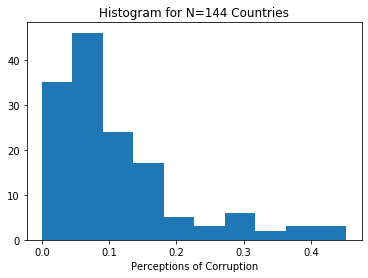

In [29]:
matplotlib.pyplot.hist(final_table['corruption'])
matplotlib.pyplot.xlabel("Perceptions of Corruption")
matplotlib.pyplot.title(f"Histogram for N={len(final_table)} Countries")

**Scatter-plot: Corruption Perception & Total COVID-19 Cases per Million**
 - This scatter-plot helps us answer questions such as whether two chosen variables can be used to determine the other in some predictable fashion. Scatter-plots are helpful in gauging associations and trends between two quantitative variables; in light of our decision to learn more about the association between these two quantitative variables, this type of visualization stands out as the best tool in our arsenal. 
 - More specifically, we want to understand whether we can use the "corruption" scores to predict the total cases per million, as well as the direction of any trend that might become apparent. Lo and behold, the scatter-plot proved itself to be helpful in this pursuit, as we learn that a small association appears to be present, indicating that **smaller perceived corruption "values" (which reflect the opinion that corruption is relatively widespread) tend to correspond to lower total cases per million!).**
 - This result encourages us to wrestle with the significance of corruption; while it is possible that corrupt countries are simply better at controlling the effects of COVID-19 on their population, other features that might characterize more corrupt governments could be more plausible factors, such as ability to enforce certain behaviors. Another example could be that more corrupt countries are poorer, and that their citizens travel less and that fewer people visit the country, as a result of the economic climate, which could serve to lessen the spread of the disease. 

Text(0.5, 1.0, 'Scatterplot for N=144 Countries')

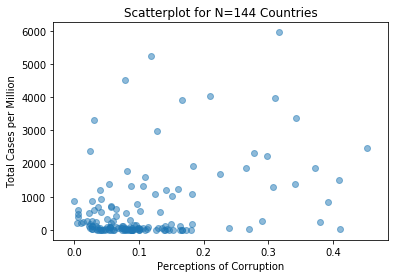

In [30]:
matplotlib.pyplot.scatter(final_table['corruption'], final_table['total_cases_per_million'], alpha=0.5)
matplotlib.pyplot.xlabel("Perceptions of Corruption")
matplotlib.pyplot.ylabel("Total Cases per Million")
matplotlib.pyplot.title(f"Scatterplot for N={len(final_table)} Countries")

# Part 4: Hypothesis Formulation:

**Q7:** What is your dependent variable and independent variable? Briefly describe how they are measured in this dataset. (Remember, they'll both need to be continuous variables.)

- **Dependent Variable:** 'total_cases_per_million'; i.e. The total number of (COVID-19) cases per Million (in a given country)
- **Independent Variable:** 'corruption'

In light of our aim to better understand socio-political factors that characterize the severity of a the impact of health crises, the 'corruption' variable will serve as the independent variable, while the total number of COVID-19 cases per million 'total_cases_per_million' will be treated as the dependent variable. 

'corruption' is measured as the average of binary answers by citizens to two questions about political and business corruption, but, when data about governmental corruption was missing, only business corruption data was used in the computation of this score. 

'total_cases_per_million' is measured in the exact way in which its name suggests, and serves as one of multiple reflections and indicators of COVID-19 prevalence. Our World in Data collects COVID-19 figures on the basis of information provided to them by the European Center for Disease Control and Prevention, who in turn measures COVID-19 in terms of updates it receives from EU/EEA countries through the Early Warning and Response System (EWRS), The European Surveillance System (TESSy), the World Health Organization (WHO) and other international stakeholders. Additionally, they perform screenings of up to 500 sources every day to collect COVID-19 figures from 196 countries. 

**Q8:** Calculate the correlation coefficient between your two variables and interpret the result.

In [31]:
corr_corruption_covid = final_table.corr()

In [32]:
correlation_value = corr_corruption_covid.loc['corruption', 'total_cases_per_million']
correlation_value

0.3908192220797604

**Correlation:** We observe a correlation of r=0.390819 between the 'corruption' explanatory variable and the "total_cases_per_million" response variable; i.e. there is a ~39% correlation between perceptions of corruption and the total cases of COVID-19 per Million in a given country. This suggest that as a country's 'corruption' score increases (reflective of less perceived corruption), their total number of COVID-19 cases per million tends to increase. The correlation coefficient in this instance is r= 0.390819, which generally indicates a weak to moderate uphill (positive) linear relationship. In the context of social-scientific variables, however, this can be considered to be quite noteworthy, given the typically large number of variables that contribute to these outcomes.

**Q9:** Write out your regression model as an equation

**Regression Equation:** 
        
        total_cases_per_million =  β0 + β1 * corruption


- β0 denotes the y-intercept of the regression line (the total cases of COVID-10 per million for a given country, when the independent variable is = 0)
- β1 denotes the regression coefficient (the predicted change in output for each unit change in input; i.e. predicted change in total cases per million for an increase of one in the 'corruption' score)

**Q10:** Write out your null and alternative hypotheses.

**Null Hypothesis:**  β1 = 0; There is no association between a country's total number of COVID-19 cases per million and the country's perceived corruption score. Any variation is due to chance; i.e. an increase in a country's 'corruption' score by one has no discernable and predictable effect on the number of COVID-19 cases per million in that country. 

**Alternative Hypothesis:** β1 ≠ 0; There is an association between a country's total number of COVID-19 cases per million and the the country's perceived corruption score; i.e. an increase in a country's 'corruption' score has an effect on the number of COVID-19 cases per million in that country. 

**Q11:** Estimate the regression equation you specified above and show the regression output.

## Part 5: Regression Analysis:

In [33]:
import statsmodels.formula.api as sm
result_tw = sm.ols(formula = 'total_cases_per_million ~ corruption', data=final_table).fit()
print(result_tw.summary())

                               OLS Regression Results                              
Dep. Variable:     total_cases_per_million   R-squared:                       0.153
Model:                                 OLS   Adj. R-squared:                  0.147
Method:                      Least Squares   F-statistic:                     25.60
Date:                     Tue, 29 Sep 2020   Prob (F-statistic):           1.28e-06
Time:                             18:54:01   Log-Likelihood:                -1200.6
No. Observations:                      144   AIC:                             2405.
Df Residuals:                          142   BIC:                             2411.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

**Regression Equation:** 
     
         Y = 132.6691335081763 + (4481.892413086443 * X)

**Q12:** What do the results in the regression output tell you? Interpret the coefficient, p-value, and confidence interval for your independent variable (you don't have to do the intercept) and the $R^2$.

#### Coefficient Interpretation:

In [34]:
val = result_tw.params["corruption"]
print(f"An increase by 1 in perceived corruption in a country is associated with a {val} increase in the total cases of COVID-19 per million.")
print()
print("Given the smaller scale used to indicate the perceived corruption score (the vast majority of the countries had a score between 0.0 and 0.4), it might be more helpful to think of it in these terms:")
print()
print("An increase of 0.1 in the perceived corruption score is associated with a", val/10, "increase in the total cases of COVID-19 per million. Given that larger 'corruption' scores indicate less perceived corruption in a country this suggest that when the 'corruption' score increases (i.e. there is less corruption ) this is associated with more COVID-19 cases per million")

An increase by 1 in perceived corruption in a country is associated with a 4481.89495988584 increase in the total cases of COVID-19 per million.

Given the smaller scale used to indicate the perceived corruption score (the vast majority of the countries had a score between 0.0 and 0.4), it might be more helpful to think of it in these terms:

An increase of 0.1 in the perceived corruption score is associated with a 448.189495988584 increase in the total cases of COVID-19 per million. Given that larger 'corruption' scores indicate less perceived corruption in a country this suggest that when the 'corruption' score increases (i.e. there is less corruption ) this is associated with more COVID-19 cases per million


#### P-values:

In [35]:
result_tw.pvalues["corruption"]

1.279012425096685e-06

In [36]:
"%f" % result_tw.pvalues["corruption"]

'0.000001'

This tells us that, under the conditions of the null hypothesis, there is a 0.0001% chance of getting a test statistic that is as high or higher than what we got for t=5.060 (for our β1). If we **randomly** generate re-samples under the assumptions of the null hypothesis, we expect to quite rarely see values that are as extreme as the number that we got. If we were to use 5% as the cut-off value, then 0.000001<0.05, meaning that we would reject the null in this case. 

#### Confidence Interval:

By looking at the values listed under the [0.025 0.975] header, we find that the 95% confidence interval for β1 is between 2730.778 and 6233.012. This means that, if we randomly re-sampled, we would expect the mean of the samples to lie between these two numbers 95% of the time. A slope of zero between two variables in a regression means no linear relationship, which does not appear to be the case here. We are, again, inclined to reject the null hypothesis. 

#### R^2:

The r^2 value that was generated by the ols function is 0.153. This can be interpreted as meaning that 15.3% of the variation in the total cases of COVID-19 per million is explained by the perceived corruption score ('corruption'). Given the lack of a clear consensus about how to interpret r^2 values, coupled with the fact that we are dealing with an outcome that is likely informed and influenced by many other variables, we could say that this value appears at least somewhat significant. These results, in other words, encourage us to consider other factors that might explain and drive the total COVID-19 cases per million. These factors could be social support, citizens' sense of freedom, governmental structures, as well as health care systems.  

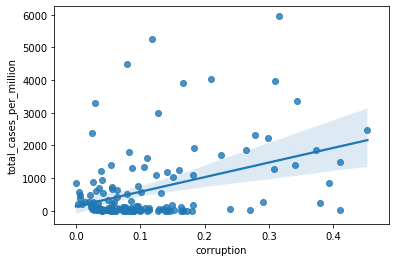

In [37]:
import seaborn as sns
sns.regplot(x="corruption", y= "total_cases_per_million", data=final_table)

**Q13:** Which hypothesis do you reject or fail to reject, and why?

It appears reasonable to reject the null hypothesis' notion that the perceived corruption score is not associated with the total number of COVID-10 cases per million in a given country. We fail to reject the alternative hypothesis; in fact, these results favor its argument, namely, that there exists an association between these two variables. More specifically, it appears that they are positively correlated. As corruption scores increase, meaning as the percevied corruption becomes less widespread, the total number of COVID-19 cases per million tend to increase as well. 

**Q14:** Generate the residual plot and comment on any heteroskedasticity. What does this imply for your inference?

**Residual Plot:**

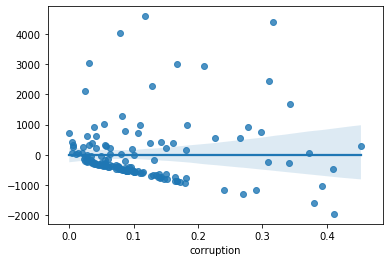

In [38]:
sns.regplot(x='corruption', y=result_tw.resid, data=final_table)

While the residual plot shows a seeminly random distribution for the most part, it exhibits a certain degree of heteroscedasticity, when we look at the lower corruption scores (i.e. countries with more corruption); the prediction errors do not appear to be entirely random. It is not completely obvious how many values are above and below zero. However, the prediction of the total number of cases per million on the lower end of the spectrum (low perceived corruption scores) differs. It appears that the model tends to "underpredict" more often in this portion, but it should be noted that the residuals tend to be smaller. A slight funnel-like pattern also appears to manifest itself somewhat; the variance corresponding to higher corruption values appears greater than for smaller value. At the end of the day, however, it would be wise to consider other variables in this particular prediction effort. Perhaps other factors are stronger determinants in some situations, while the 'corruption' score is better in other situations...

# Part 6: Conclusions

**Q15:** What biases might be present in the sample itself that could be affecting the outcome? Discuss at least two sources of bias.

It should be noted that certain countries have been testing their citizens to a far greater degree than others have. As a consequence, the notion that the total_cases_per_million variable might at least partially be a function of testing prevalence appears entirely within the bounds of possibility, and could be considered an example of survivorship bias; i.e. the variable might fail to take into account, in a reflective sense, COVID-19 victims who simply were not tested, due to their lack of visibility. While the United States, for instance, has been the world leader in terms of total tests performed, it is only represented once amongst the top 400 most active testers (in terms total test per thousand) in the original dataset containing all the entries. Iceland, on the other hand, has been testing its citizen far more systematically and rigorously, when inspected through the lense of proportion. Perhaps the US is, relatively speaking, underrepresented in terms of 'total_cases_per_million'. What we see is what we get, and, unfortunately, we do not get as much as we might like. 

Another bias that might be at play here is non-response bias; sciencedirect.com explains that "non-response bias can occur when subjects who refuse to take part in a study, or who drop out before the study can be completed, are systematically different from those who participate". It is entirely possible that certain people systematically did not want to participate. If then feared retaliation, in one form or anyother, for criticizing your country, then vulnerable people in countries with less freedom and/or more agressive regimes might not participate in these types of questinairres due to fear. That would make their countries appear less corrupt that they are actually perceived as by their citizens. 

**Q16:** Considering all the work you've done, including the regression output, the results of your hypothesis tests, and any biases present in the data, what conclusions, however tentative, can you draw from your analysis about the relationship between your two variables of interest?

While causation should certainly not be inferred on the basis of this investigation, the perceived corruption score **does** seem to capture something interesting, and perhaps seemingly unexpected at first, about a nation's ability (or, perhaps, willingess) to limit outbreaks. The notion that more corruption indicates fewer cases of COVID-19 per million does not appear to be very intuitive, so the argument for why this association deserves more attention is two-fold: 1) the idea that perceptions of corruption have anything to do with pandemic outcomes at all, and 2) the idea that **greater** perceived corruption appears to indicate **fewer** cases of COVID-19 per million). The case for an association is clear, but the need for an incorporation of more variables into this model appears necessary and appropriate. Ultimately, the presence of a link between perceived corruption scores and health outcomes during pandemics in a given country remains conceivable. Although we can not say much about causation in this case, it appears reasonable to view a link of this type as indirect in nature. However, given the great number of factors that typically generate macro-scale outcomes in social settings, the correlation of ~0.39 and inspection of the data under the null hypothesis, this model remains compelling, but is, most likely, incomplete. 

**Q17:** What is your analysis’s greatest weakness? In other words, what are the best reasons to be cautious about what we can learn from it?

A little bird recently proclaimed on national television that "models are only as good as the assumptions that we put into them", in response to a question concerning the utility of statistical models attempting to predict the progression of COVID-19. That bird may or may not have been Mr. Fauci - a man of his time, yet timeless. The same logic can, and should, be extended to this instance. In the construction of this study, as well as the respective datasets, assumptions were made at multiple levels.

As was pointed out in the answer to Q15, our prediction hinges on the assumption that the total_cases_per_million variable reasonably reflects the prevalence of COVID-19 cases. An argument in favor of this proposition can be made just as easily as an argument against it. We might get a better sense as to which direction the truth lies if more countries begin to follow in the footsteps of South Korea and Denmark; the latter plans to implement randomized testing, in their efforts to paint a broader, more truthful picture of this pandemic's reach.

Likewise, the subjectivity that went into the formulation of the "corruption" variable, along with the people whom contributed their answers and data, warrants concern. The actual corruption might be greater or smaller than the citizen's concept of it, and might also be mistaken for poor social institutions. If the educational system in a country is on the lower end, that might be a product of poor policies, rather than corruption, and it could be difficult to navigate this delicate distinction. Furthermore, given that we can not distinguish political corruption from business-related corruption, our inference should be limited to what we know: that this **likely** is a semi-reflection of what is really going on, as opposed to a true reflection of corruption. The same should be considered when looking at the COVID-19 numbers: it only partially reflects the true number of cases per million in a given country. 